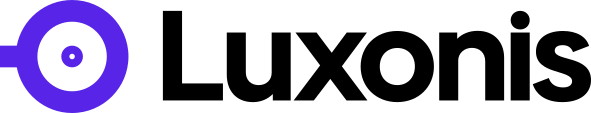

# DataDreamer helmet detection tutorial

In [ ]:
!pip install datadreamer

Dataset generation time (8 CPU & 30GB RAM & L4 (24GB) GPU):
- Prompt generation (TinyLlama) - 3h
- Image generation (SDXL-Turbo) - 10h
- Image annotation (OWLv2) - 3h

In [ ]:
# append person to the class_names to add some negative examples (people without helmets)
!datadreamer --save_dir gen_dataset_helmet_10000_turbo_tiny \
             --class_names helmet \
             --prompts_number 10000 \
             --disable_lm_filter \
             --prompt_generator tiny \
             --num_objects_range 1 1 \
             --image_generator sdxl-turbo \
             --use_image_tester \
             --image_tester_patience 3 \
             --use_tta   

In [ ]:
from datadreamer.utils.convert_dataset import convert_dataset
# Conversion to YOLO format
convert_dataset(input_dir="gen_dataset_helmet_10000_turbo_tiny", output_dir="gen_dataset_helmet_10000_turbo_tiny_yolo", dataset_format="yolo", split_ratios=[0.95, 0.05, 0.0], copy_files=True)

## Train images

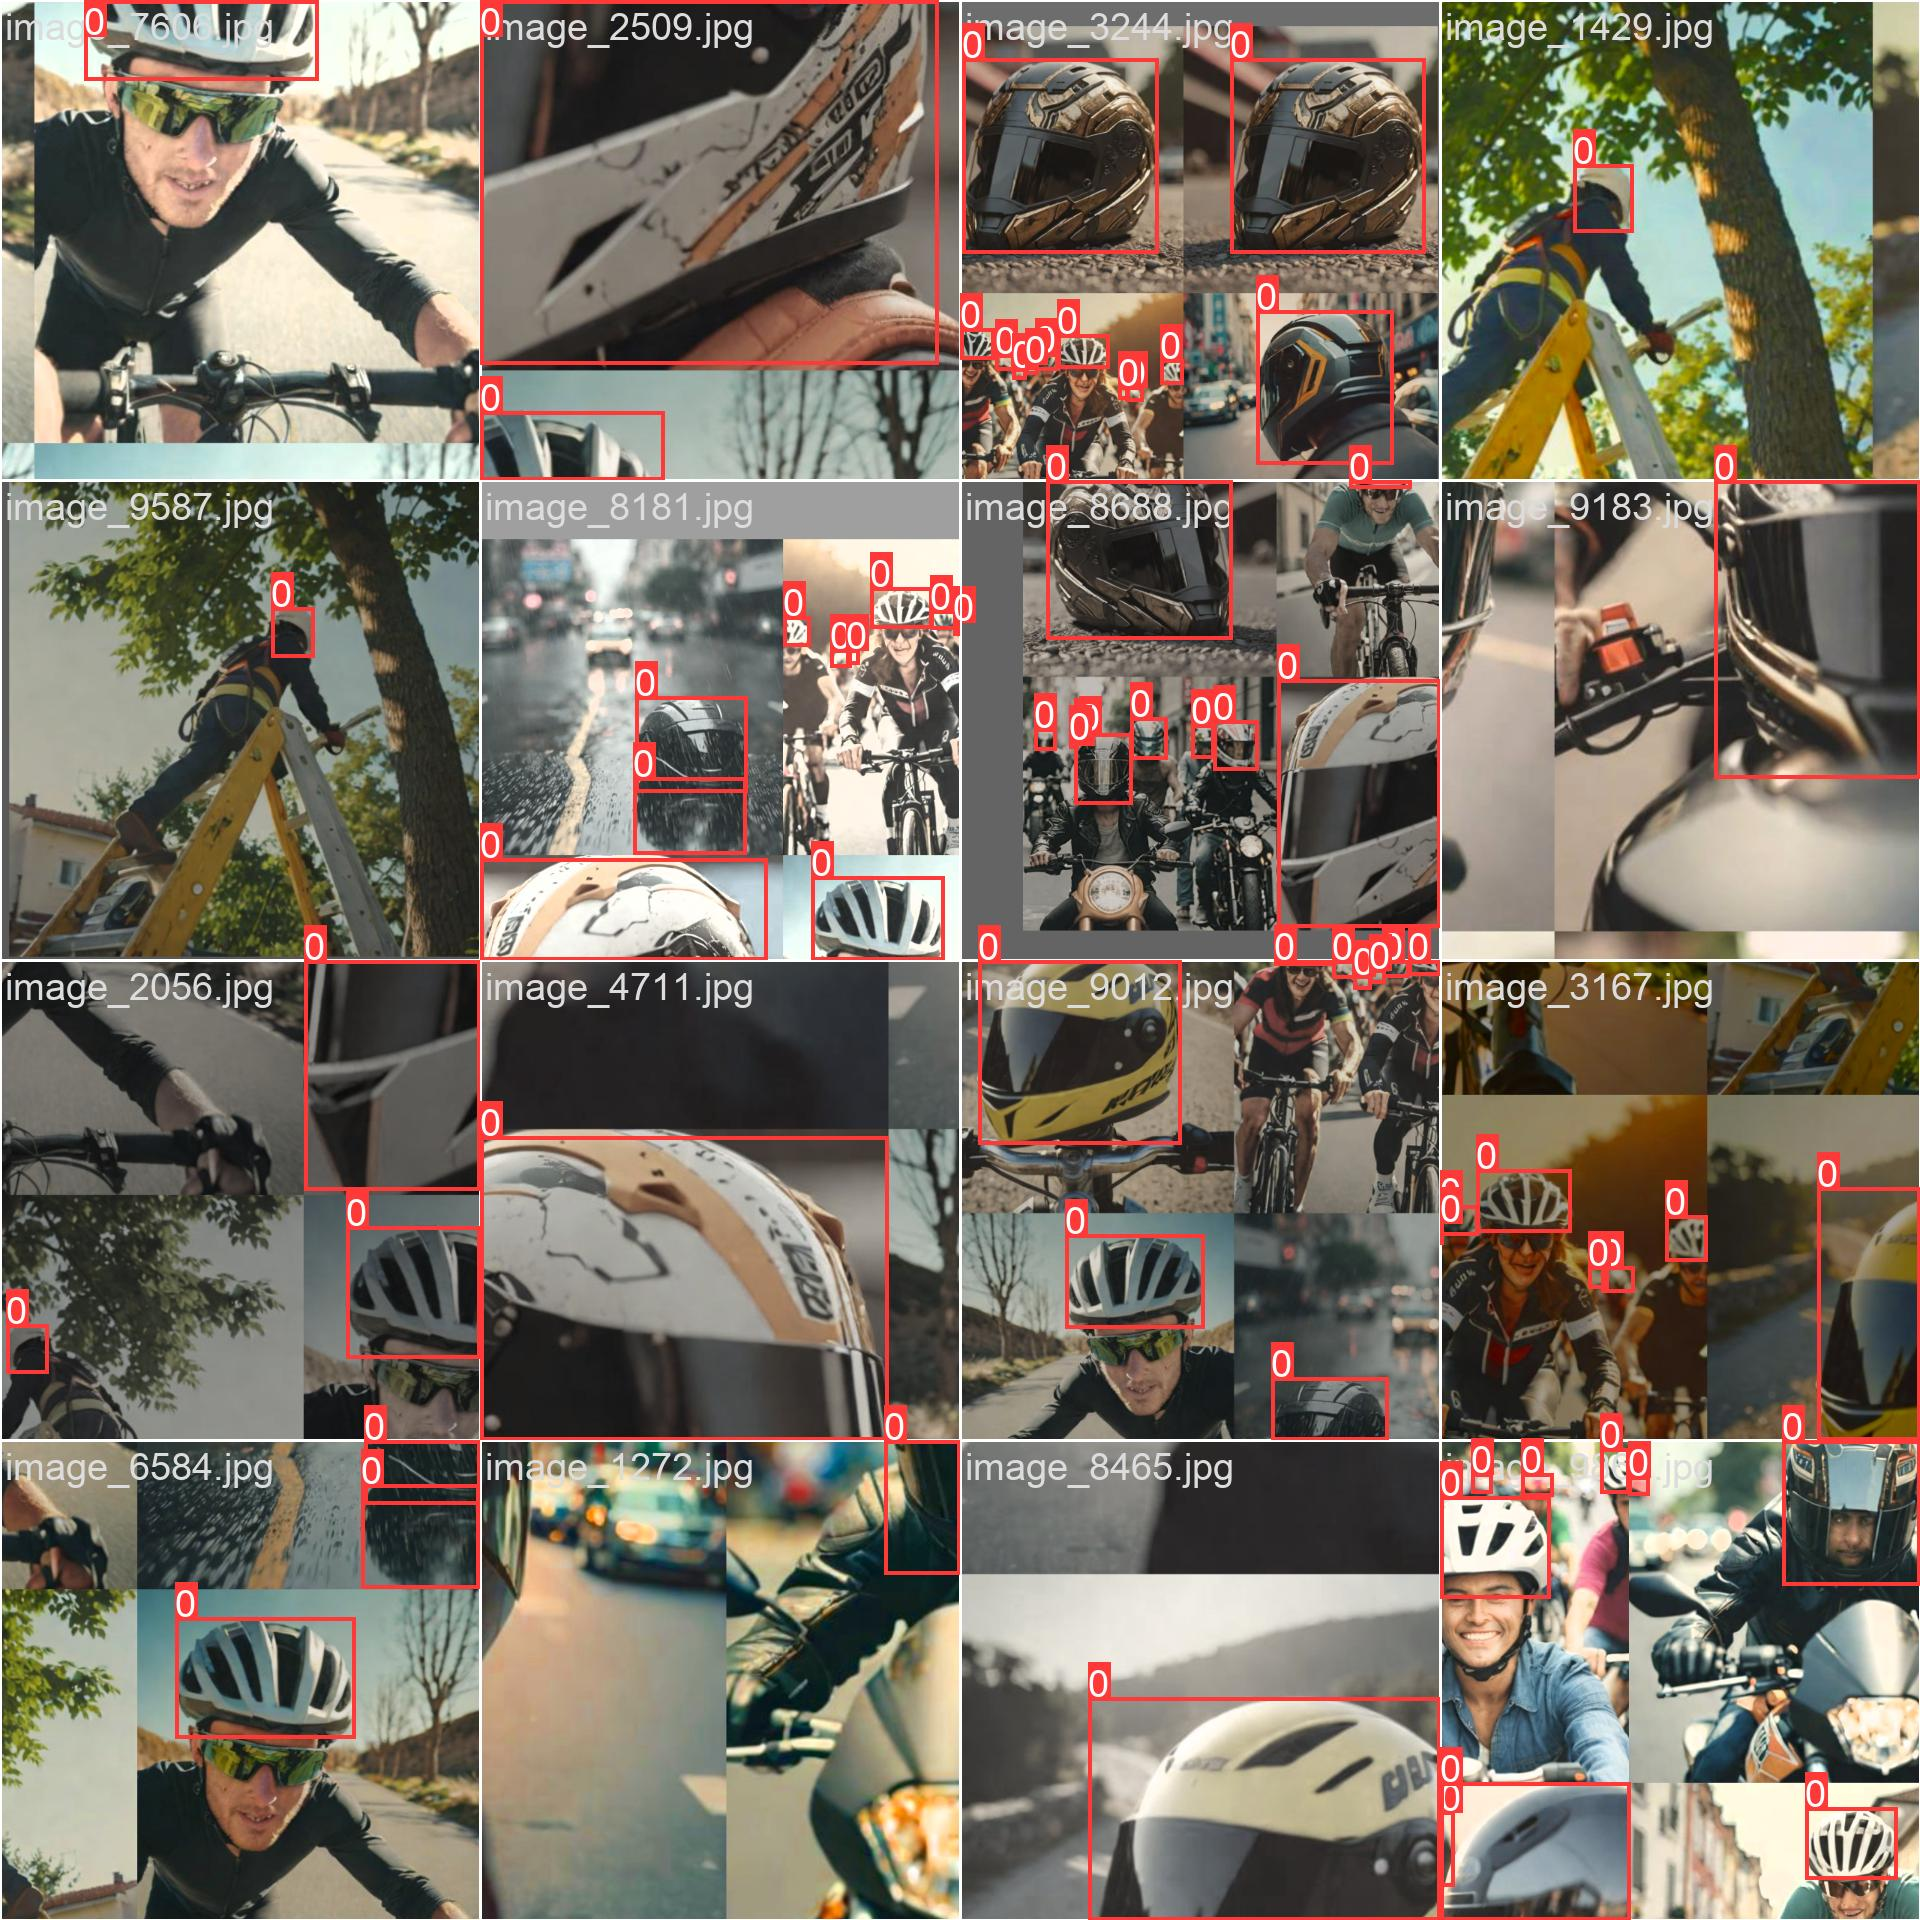

## YOLOv8 training

In [ ]:
!pip install ultralytics

In [ ]:
!yolo detect train data=gen_dataset_helmet_10000_turbo_tiny_yolo/data.yaml model=yolov8m.pt epochs=30

## Validation set predictions

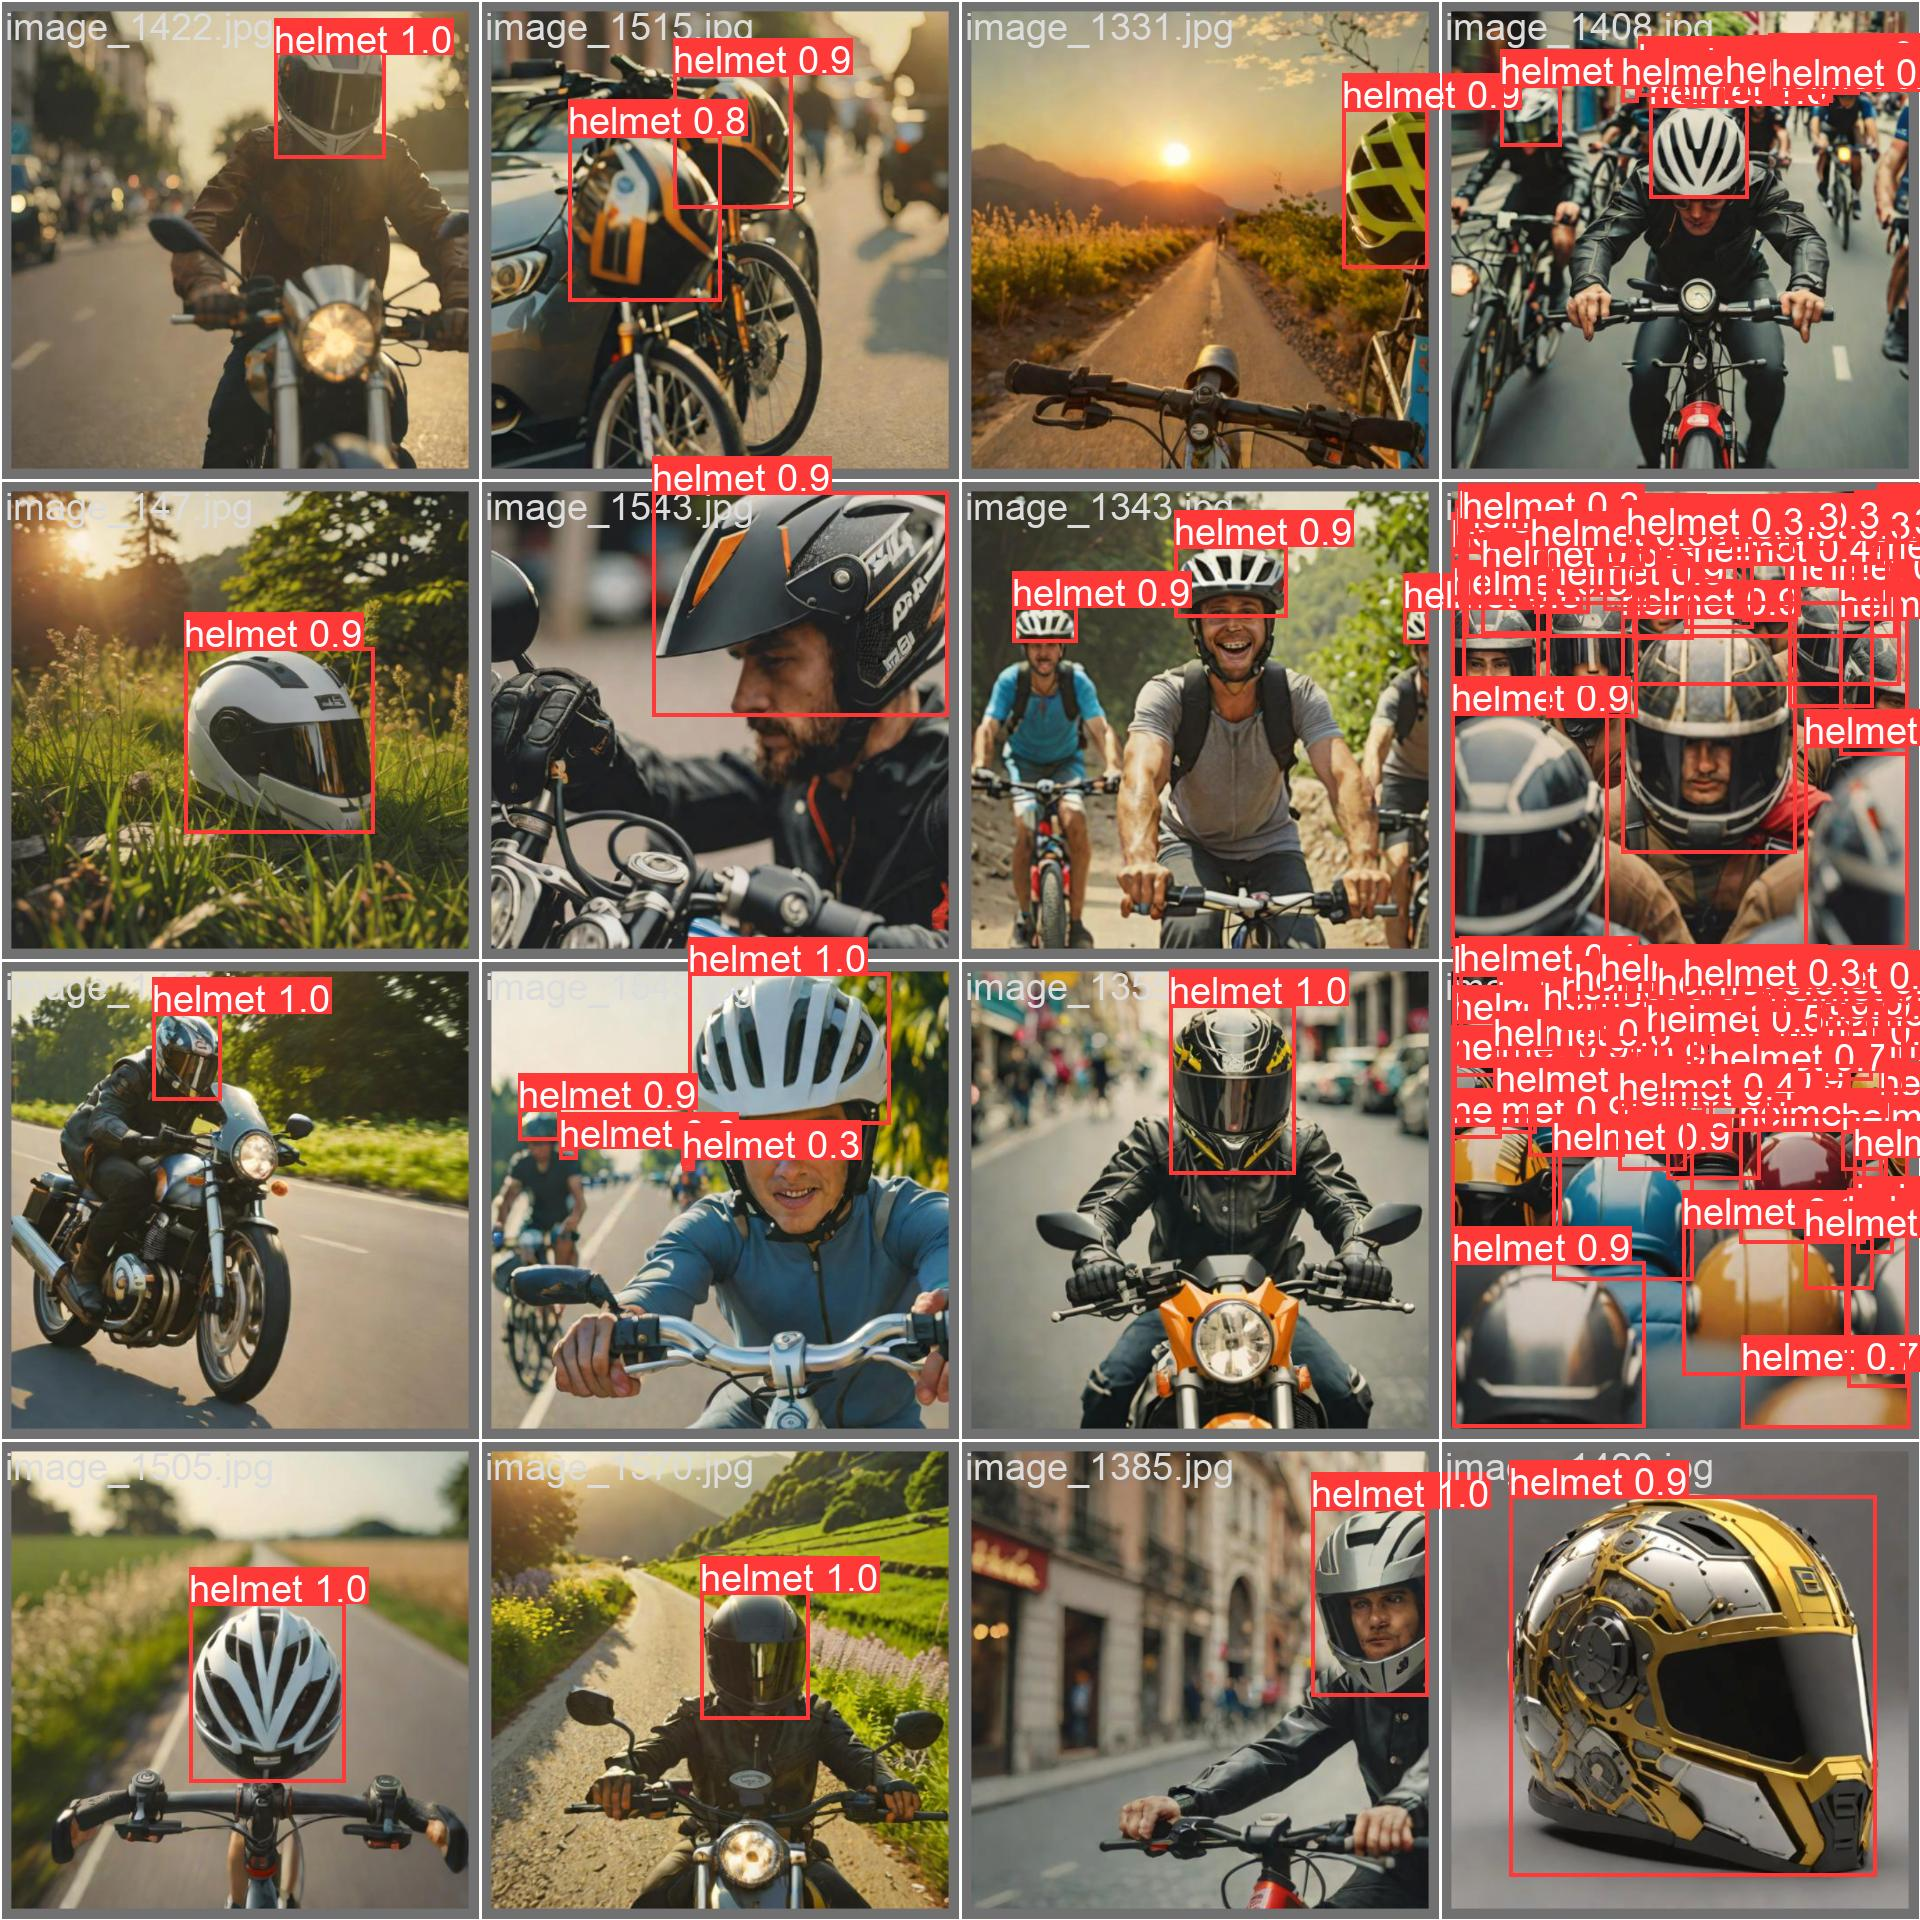

## Inference example

In [ ]:
!yolo predict model=<model_path> source=<source_video_path.mp4>

Model weights are available here: https://drive.google.com/file/d/1wk0TxUaaInhnpYeTLHiWkKoAPsk_hCM9/view?usp=drive_link  (not production ready, but can serve as a good starting point)

Tutorial with export instructions: https://github.com/luxonis/datadreamer/blob/main/examples/generate_dataset_and_train_yolo.ipynb

Real video performance: https://www.youtube.com/watch?v=6FcSz3uFqRI